# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [3]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [5]:
import numpy as np
import pandas as pd
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10) * 0.5, index = tuple(letters[:10]))
print("xs:", xs,'\n')
print("xs indexes:", xs.index, '\n')
# Values of the Series are actually a numpy array
print("xs values:", xs.values, type(xs.values), '\n')
print(xs['f'], xs.f, xs.h, '\n')
print(xs[['d', 'f', 'h']], '\n')
print(type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [13]:
# Extracting elements and operations: same as numpy array
print(xs[:3],'\n')
print(xs[7:], '\n')
print(xs[::3], '\n')
print(xs[xs>3], '\n')
print(np.exp(xs), '\n')
print(np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [21]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [27]:
s = pd.Series(np.random.randn(5), index = tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.562115
b    0.834436
c   -1.018938
d    0.118057
e   -0.986927
dtype: float64
a         NaN
b    1.668873
c   -2.037876
d    0.236113
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [9]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15)
print(date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print(date)

days    = pd.date_range(date, periods = 7, freq = 'D')
print(days)

seconds = pd.date_range(date, periods = 3600, freq = 's')
print(seconds)


2025-01-04
2024-11-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [11]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [33]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index = days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00     9.986087
2024-11-28 10:45:00     9.497615
2024-11-29 10:45:00     9.091220
2024-11-30 10:45:00    10.110492
Freq: D, dtype: float64 

2024-11-27 10:45:00     9.986087
2024-11-28 10:45:00     9.497615
2024-11-29 10:45:00     9.091220
2024-11-30 10:45:00    10.110492
2024-12-01 10:45:00    10.181862
2024-12-02 10:45:00    10.094540
2024-12-03 10:45:00    10.540355
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [37]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [13]:
entries = 10
dates = pd.date_range('11/27/2024 10:45:00', freq='h', periods = entries)
print(dates)
print("")
df = pd.DataFrame(np.random.randn(entries, 4), index = dates, columns = ['A','B','C','D'])
df


DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')



,A,B,C,D
2024-11-27 10:45:00,-0.252290,1.085727,-0.343273,0.114466
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,1.834366
2024-11-27 12:45:00,1.079256,0.266933,1.361930,-0.577019
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,0.533898
2024-11-27 14:45:00,0.195555,0.627161,2.253893,-1.183700
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,-0.404869
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,0.339052
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,-1.922149
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,1.210508
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,0.459513


or by means of a dictionary:


In [15]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1, index = range(4), dtype = 'float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [17]:
df

,A,B,C,D
2024-11-27 10:45:00,-0.252290,1.085727,-0.343273,0.114466
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,1.834366
2024-11-27 12:45:00,1.079256,0.266933,1.361930,-0.577019
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,0.533898
2024-11-27 14:45:00,0.195555,0.627161,2.253893,-1.183700
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,-0.404869
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,0.339052
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,-1.922149
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,1.210508
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,0.459513


In [52]:
df.head(2)

,A,B,C,D
2024-11-27 10:45:00,1.488215,-0.406686,-0.578906,0.422111
2024-11-27 11:45:00,-1.375446,0.861966,-0.046931,0.032198


In [54]:
df.tail(4)

,A,B,C,D
2024-11-27 16:45:00,-0.229526,-0.312337,0.434997,0.293407
2024-11-27 17:45:00,1.997222,-0.434597,0.151379,0.546655
2024-11-27 18:45:00,-0.741106,0.395226,0.892613,-1.889761
2024-11-27 19:45:00,-0.802822,-0.916136,-0.002988,0.820952


In [56]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [58]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [60]:
df.values

array([[ 1.48821524, -0.4066858 , -0.57890613,  0.42211125],
       [-1.37544641,  0.86196551, -0.04693072,  0.03219797],
       [-0.14026432, -0.28543096,  0.55082568,  0.99385458],
       [-0.42115487,  1.60995968, -0.7445106 ,  0.51323522],
       [-0.77339237, -1.04149584,  1.14868205,  1.01628635],
       [ 2.04929205, -0.9277344 , -1.14042691, -0.18897929],
       [-0.22952629, -0.31233693,  0.4349966 ,  0.29340712],
       [ 1.99722238, -0.43459691,  0.15137901,  0.54665541],
       [-0.74110627,  0.39522576,  0.89261343, -1.88976068],
       [-0.80282153, -0.91613562, -0.00298846,  0.82095182]])

In [62]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.105102,-0.145727,0.066473,0.255996
std,1.257259,0.856141,0.728759,0.848113
min,-1.375446,-1.041496,-1.140427,-1.889761
25%,-0.765321,-0.795751,-0.445912,0.097500
50%,-0.325341,-0.359511,0.074195,0.467673
75%,1.081095,0.225062,0.521868,0.752378
max,2.049292,1.609960,1.148682,1.016286


In [64]:
df.T

,2024-11-27 10:45:00,2024-11-27 11:45:00,2024-11-27 12:45:00,2024-11-27 13:45:00,2024-11-27 14:45:00,2024-11-27 15:45:00,2024-11-27 16:45:00,2024-11-27 17:45:00,2024-11-27 18:45:00,2024-11-27 19:45:00
A,1.488215,-1.375446,-0.140264,-0.421155,-0.773392,2.049292,-0.229526,1.997222,-0.741106,-0.802822
B,-0.406686,0.861966,-0.285431,1.609960,-1.041496,-0.927734,-0.312337,-0.434597,0.395226,-0.916136
C,-0.578906,-0.046931,0.550826,-0.744511,1.148682,-1.140427,0.434997,0.151379,0.892613,-0.002988
D,0.422111,0.032198,0.993855,0.513235,1.016286,-0.188979,0.293407,0.546655,-1.889761,0.820952


In [88]:
df.sort_index(axis = 0, ascending = True)

,A,B,C,D
2024-11-27 10:45:00,1.488215,-0.406686,-0.578906,0.422111
2024-11-27 11:45:00,-1.375446,0.861966,-0.046931,0.032198
2024-11-27 12:45:00,-0.140264,-0.285431,0.550826,0.993855
2024-11-27 13:45:00,-0.421155,1.609960,-0.744511,0.513235
2024-11-27 14:45:00,-0.773392,-1.041496,1.148682,1.016286
2024-11-27 15:45:00,2.049292,-0.927734,-1.140427,-0.188979
2024-11-27 16:45:00,-0.229526,-0.312337,0.434997,0.293407
2024-11-27 17:45:00,1.997222,-0.434597,0.151379,0.546655
2024-11-27 18:45:00,-0.741106,0.395226,0.892613,-1.889761
2024-11-27 19:45:00,-0.802822,-0.916136,-0.002988,0.820952


In [21]:
df.sort_values(by = "C", ascending = False)

,A,B,C,D
2024-11-27 14:45:00,0.195555,0.627161,2.253893,-1.183700
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,0.459513
2024-11-27 12:45:00,1.079256,0.266933,1.361930,-0.577019
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,0.339052
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,1.834366
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,-0.404869
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,-1.922149
2024-11-27 10:45:00,-0.252290,1.085727,-0.343273,0.114466
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,1.210508
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,0.533898


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [82]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00    1.488215
2024-11-27 11:45:00   -1.375446
2024-11-27 12:45:00   -0.140264
2024-11-27 13:45:00   -0.421155
2024-11-27 14:45:00   -0.773392
2024-11-27 15:45:00    2.049292
2024-11-27 16:45:00   -0.229526
2024-11-27 17:45:00    1.997222
2024-11-27 18:45:00   -0.741106
2024-11-27 19:45:00   -0.802822
Freq: h, Name: A, dtype: float64 

2024-11-27 10:45:00    1.488215
2024-11-27 11:45:00   -1.375446
2024-11-27 12:45:00   -0.140264
2024-11-27 13:45:00   -0.421155
2024-11-27 14:45:00   -0.773392
2024-11-27 15:45:00    2.049292
2024-11-27 16:45:00   -0.229526
2024-11-27 17:45:00    1.997222
2024-11-27 18:45:00   -0.741106
2024-11-27 19:45:00   -0.802822
Freq: h, Name: A, dtype: float64


In [84]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00  1.488215 -0.406686 -0.578906  0.422111
2024-11-27 11:45:00 -1.375446  0.861966 -0.046931  0.032198
2024-11-27 12:45:00 -0.140264 -0.285431  0.550826  0.993855
                            A         B         C         D
2024-11-27 10:45:00  1.488215 -0.406686 -0.578906  0.422111
2024-11-27 11:45:00 -1.375446  0.861966 -0.046931  0.032198
2024-11-27 12:45:00 -0.140264 -0.285431  0.550826  0.993855


### Selection by label

In [92]:
df

,A,B,C,D
2024-11-27 10:45:00,1.488215,-0.406686,-0.578906,0.422111
2024-11-27 11:45:00,-1.375446,0.861966,-0.046931,0.032198
2024-11-27 12:45:00,-0.140264,-0.285431,0.550826,0.993855
2024-11-27 13:45:00,-0.421155,1.609960,-0.744511,0.513235
2024-11-27 14:45:00,-0.773392,-1.041496,1.148682,1.016286
2024-11-27 15:45:00,2.049292,-0.927734,-1.140427,-0.188979
2024-11-27 16:45:00,-0.229526,-0.312337,0.434997,0.293407
2024-11-27 17:45:00,1.997222,-0.434597,0.151379,0.546655
2024-11-27 18:45:00,-0.741106,0.395226,0.892613,-1.889761
2024-11-27 19:45:00,-0.802822,-0.916136,-0.002988,0.820952


In [96]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.488215
B   -0.406686
C   -0.578906
D    0.422111
Name: 2024-11-27 10:45:00, dtype: float64

In [98]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,1.488215,-0.406686
2024-11-27 11:45:00,-1.375446,0.861966
2024-11-27 12:45:00,-0.140264,-0.285431
2024-11-27 13:45:00,-0.421155,1.609960
2024-11-27 14:45:00,-0.773392,-1.041496
2024-11-27 15:45:00,2.049292,-0.927734
2024-11-27 16:45:00,-0.229526,-0.312337
2024-11-27 17:45:00,1.997222,-0.434597
2024-11-27 18:45:00,-0.741106,0.395226
2024-11-27 19:45:00,-0.802822,-0.916136


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00', ['A','B']]

,A,B
2024-11-27 14:45:00,0.195555,0.627161
2024-11-27 15:45:00,1.619613,-0.036769
2024-11-27 16:45:00,-0.803164,-0.631219


In [25]:
# getting an individual element
print (df.loc[dates[1], 'A'])

# equivalently
print (df.at[dates[1], 'A'])

-0.8026909807620412
-0.8026909807620412


### Selecting by position

In [33]:
# select via the position of the passed integers:
print(df.iloc[3],'\n')

# notation similar to numpy/python
print(df.iloc[3:5, 0:2])

A   -1.363294
B   -0.599959
C   -1.598466
D    0.533898
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00 -1.363294 -0.599959
2024-11-27 14:45:00  0.195555  0.627161


In [35]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4], [0,2]]

,A,C
2024-11-27 11:45:00,-0.802691,1.292096
2024-11-27 12:45:00,1.079256,1.361930
2024-11-27 14:45:00,0.195555,2.253893


In [126]:
# slicing rows explicitly
print(df.iloc[1:3, :], '\n')

# slicing columns explicitly
print(df.iloc[:, 1:3])
print("")

# selecting an individual element by position
print(df.iloc[1, 1])

                            A         B         C         D
2024-11-27 11:45:00 -1.375446  0.861966 -0.046931  0.032198
2024-11-27 12:45:00 -0.140264 -0.285431  0.550826  0.993855 

                            B         C
2024-11-27 10:45:00 -0.406686 -0.578906
2024-11-27 11:45:00  0.861966 -0.046931
2024-11-27 12:45:00 -0.285431  0.550826
2024-11-27 13:45:00  1.609960 -0.744511
2024-11-27 14:45:00 -1.041496  1.148682
2024-11-27 15:45:00 -0.927734 -1.140427
2024-11-27 16:45:00 -0.312337  0.434997
2024-11-27 17:45:00 -0.434597  0.151379
2024-11-27 18:45:00  0.395226  0.892613
2024-11-27 19:45:00 -0.916136 -0.002988

0.8619655117836861


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [114]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 11:45:00,-1.375446,0.861966,-0.046931,0.032198
2024-11-27 13:45:00,-0.421155,1.609960,-0.744511,0.513235
2024-11-27 18:45:00,-0.741106,0.395226,0.892613,-1.889761


In [118]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df > 0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2024-11-27 10:45:00,1.488215,NaN,NaN,0.422111
2024-11-27 11:45:00,NaN,0.861966,NaN,0.032198
2024-11-27 12:45:00,NaN,NaN,0.550826,0.993855
2024-11-27 13:45:00,NaN,1.609960,NaN,0.513235
2024-11-27 14:45:00,NaN,NaN,1.148682,1.016286
2024-11-27 15:45:00,2.049292,NaN,NaN,NaN
2024-11-27 16:45:00,NaN,NaN,0.434997,0.293407
2024-11-27 17:45:00,1.997222,NaN,0.151379,0.546655
2024-11-27 18:45:00,NaN,0.395226,0.892613,NaN
2024-11-27 19:45:00,NaN,NaN,NaN,0.820952


### Setting

Combination of selection and setting of values

In [49]:
# setting values by label (same as by position)
df.at[dates[0], 'A'] = 0

# setting and assigning a numpy array
df.loc[:, 'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df)) * 0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df)) * 2, index = df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,5.0,0.5,2
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,5.0,1.5,6
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,10
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,12
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,14
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,16
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,18


In [51]:
def dcos(theta):
    theta = theta * (np.pi / 180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index = df.index)
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,5.0,0.5,2,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,5.0,1.5,6,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,14,0.998135
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,18,0.996917


In [37]:
# another example of global setting
df2 = df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D
2024-11-27 10:45:00,-0.252290,-1.085727,-0.343273,-0.114466
2024-11-27 11:45:00,-0.802691,-0.163231,-1.292096,-1.834366
2024-11-27 12:45:00,-1.079256,-0.266933,-1.361930,-0.577019
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,-0.533898
2024-11-27 14:45:00,-0.195555,-0.627161,-2.253893,-1.183700
2024-11-27 15:45:00,-1.619613,-0.036769,-1.219751,-0.404869
2024-11-27 16:45:00,-0.803164,-0.631219,-1.293424,-0.339052
2024-11-27 17:45:00,-0.355576,-0.051492,-0.325059,-1.922149
2024-11-27 18:45:00,-0.610463,-0.675481,-0.446804,-1.210508
2024-11-27 19:45:00,-0.788320,-1.349348,-2.004211,-0.459513


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [39]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`
#
print(dfd)
print("")

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`
#
print(dfd)



     a  b
0  100  4
1    2  5
2    3  6

     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [41]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/tmp/ipykernel_2483/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [43]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [53]:
print(df)

                            A         B         C    D    E  E prime    cosine
2024-11-27 10:45:00  0.000000  1.085727 -0.343273  5.0  0.0        0  1.000000
2024-11-27 11:45:00 -0.802691  0.163231  1.292096  5.0  0.5        2  0.999962
2024-11-27 12:45:00  1.079256  0.266933  1.361930  5.0  1.0        4  0.999848
2024-11-27 13:45:00 -1.363294 -0.599959 -1.598466  5.0  1.5        6  0.999657
2024-11-27 14:45:00  0.195555  0.627161  2.253893  5.0  2.0        8  0.999391
2024-11-27 15:45:00  1.619613 -0.036769  1.219751  5.0  2.5       10  0.999048
2024-11-27 16:45:00 -0.803164 -0.631219  1.293424  5.0  3.0       12  0.998630
2024-11-27 17:45:00  0.355576 -0.051492 -0.325059  5.0  3.5       14  0.998135
2024-11-27 18:45:00  0.610463 -0.675481 -0.446804  5.0  4.0       16  0.997564
2024-11-27 19:45:00 -0.788320 -1.349348  2.004211  5.0  4.5       18  0.996917


In [55]:
# Dropping by column
df.drop(['E prime'], axis = 1)

#which is equivalent to
new_df = df.drop(columns = ['E prime'])
new_df

,A,B,C,D,E,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,1.000000
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,5.0,0.5,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,0.999848
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,5.0,1.5,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,0.999391
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,0.999048
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,0.998630
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,0.998135
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,0.997564
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,0.996917


In [57]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0,1.000000
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,14,0.998135
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,18,0.996917


In [59]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,5.0,0.5,2,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,5.0,1.5,6,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,14,0.998135
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,18,0.996917


In [63]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
print(pd.to_datetime("2024-11-27 18:45:00"))
print(df.drop(pd.to_datetime("2024-11-27 18:45:00")))

2024-11-27 18:45:00
                            A         B         C    D    E  E prime    cosine
2024-11-27 10:45:00  0.000000  1.085727 -0.343273  5.0  0.0        0  1.000000
2024-11-27 11:45:00 -0.802691  0.163231  1.292096  5.0  0.5        2  0.999962
2024-11-27 12:45:00  1.079256  0.266933  1.361930  5.0  1.0        4  0.999848
2024-11-27 13:45:00 -1.363294 -0.599959 -1.598466  5.0  1.5        6  0.999657
2024-11-27 14:45:00  0.195555  0.627161  2.253893  5.0  2.0        8  0.999391
2024-11-27 15:45:00  1.619613 -0.036769  1.219751  5.0  2.5       10  0.999048
2024-11-27 16:45:00 -0.803164 -0.631219  1.293424  5.0  3.0       12  0.998630
2024-11-27 17:45:00  0.355576 -0.051492 -0.325059  5.0  3.5       14  0.998135
2024-11-27 19:45:00 -0.788320 -1.349348  2.004211  5.0  4.5       18  0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [71]:
df_wNan = df[df > 0]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,1.085727,NaN,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,0.163231,1.292096,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,NaN,NaN,NaN,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.619613,NaN,1.219751,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,NaN,NaN,1.293424,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.355576,NaN,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.610463,NaN,NaN,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,NaN,NaN,2.004211,5.0,4.5,18.0,0.996917


In [73]:
# dropping raws with at least a Nan
df_wNan.dropna(how = 'any')

,A,B,C,D,E,E prime,cosine
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4.0,0.999848
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8.0,0.999391


In [75]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,False,True,False,True,True,False
2024-11-27 11:45:00,True,False,False,False,False,False,False
2024-11-27 12:45:00,False,False,False,False,False,False,False
2024-11-27 13:45:00,True,True,True,False,False,False,False
2024-11-27 14:45:00,False,False,False,False,False,False,False
2024-11-27 15:45:00,False,True,False,False,False,False,False
2024-11-27 16:45:00,True,True,False,False,False,False,False
2024-11-27 17:45:00,False,True,True,False,False,False,False
2024-11-27 18:45:00,False,True,True,False,False,False,False
2024-11-27 19:45:00,True,True,False,False,False,False,False


In [77]:
# filling missing data
df_wNan.fillna(value = 0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,0.000000,5.0,0.0,0.0,1.000000
2024-11-27 11:45:00,0.000000,0.163231,1.292096,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.000000,0.000000,0.000000,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.619613,0.000000,1.219751,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.000000,0.000000,1.293424,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.355576,0.000000,0.000000,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.610463,0.000000,0.000000,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.000000,0.000000,2.004211,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [86]:
df_wNan.fillna(method = 'pad')

/tmp/ipykernel_2483/1896099706.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method = 'pad')


,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,1.085727,NaN,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,0.163231,1.292096,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,1.079256,0.266933,1.361930,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.619613,0.627161,1.219751,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,1.619613,0.627161,1.293424,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.355576,0.627161,1.293424,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.610463,0.627161,1.293424,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.610463,0.627161,2.004211,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [82]:
# Some statistics (mean() just as an example)
# raws
print(df.mean(axis = 0),'\n')
# columns
print(df.mean(axis = 1),'\n')

A          0.010299
B         -0.120122
C          0.671170
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2024-11-27 10:45:00    0.963208
2024-11-27 11:45:00    1.307514
2024-11-27 12:45:00    1.958281
2024-11-27 13:45:00    1.419705
2024-11-27 14:45:00    2.725143
2024-11-27 15:45:00    3.043092
2024-11-27 16:45:00    2.979667
2024-11-27 17:45:00    3.353880
2024-11-27 18:45:00    3.640820
2024-11-27 19:45:00    4.051923
Freq: h, dtype: float64 



In [84]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.802691,1.248958,0.948823,10.0,0.5,2,1.999962
2024-11-27 12:45:00,0.276565,1.515890,2.310753,15.0,1.5,6,2.999810
2024-11-27 13:45:00,-1.086729,0.915931,0.712287,20.0,3.0,12,3.999467
2024-11-27 14:45:00,-0.891174,1.543092,2.966180,25.0,5.0,20,4.998858
2024-11-27 15:45:00,0.728438,1.506323,4.185931,30.0,7.5,30,5.997906
2024-11-27 16:45:00,-0.074726,0.875104,5.479355,35.0,10.5,42,6.996536
2024-11-27 17:45:00,0.280850,0.823613,5.154295,40.0,14.0,56,7.994670
2024-11-27 18:45:00,0.891313,0.148131,4.707491,45.0,18.0,72,8.992234
2024-11-27 19:45:00,0.102993,-1.201217,6.711702,50.0,22.5,90,9.989152


In [88]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,1.085727,-0.343273,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.802691,0.163231,1.292096,5.0,0.5,2,0.999962
2024-11-27 12:45:00,1.079256,0.266933,1.361930,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-1.363294,-0.599959,-1.598466,5.0,1.5,6,0.999657
2024-11-27 14:45:00,0.195555,0.627161,2.253893,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.619613,-0.036769,1.219751,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.803164,-0.631219,1.293424,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.355576,-0.051492,-0.325059,5.0,3.5,14,0.998135
2024-11-27 18:45:00,0.610463,-0.675481,-0.446804,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.788320,-1.349348,2.004211,5.0,4.5,18,0.996917


In [90]:
df.apply(lambda x: x.max() - x.min())

A           2.982906
B           2.435076
C           3.852359
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [92]:
# syntax is as usual similar to that of numpy arrays
df['A'] + df['B']

2024-11-27 10:45:00    1.085727
2024-11-27 11:45:00   -0.639460
2024-11-27 12:45:00    1.346189
2024-11-27 13:45:00   -1.963253
2024-11-27 14:45:00    0.822716
2024-11-27 15:45:00    1.582844
2024-11-27 16:45:00   -1.434383
2024-11-27 17:45:00    0.304084
2024-11-27 18:45:00   -0.065018
2024-11-27 19:45:00   -2.137669
Freq: h, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [96]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name = "~/data/data_000637.txt"
data = pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [105]:
# the one-liner killing it all
data['timens'] = data['TDC_MEAS'] * 25 / 30 + data['BX_COUNTER'] * 25

In [107]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [103]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [109]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.550444,-0.963915,-0.648580,0.276676
1,-0.691512,-0.265487,1.019201,-0.316344
2,1.429373,1.587312,-0.082577,-1.254736
3,-0.153482,-0.535684,1.311721,0.576119
4,0.377153,1.177350,0.911783,-1.036822
5,-0.563683,-0.179917,1.097570,0.092107
6,0.690233,-0.633318,-0.033440,-0.492242
7,1.102816,0.026182,1.532323,0.618917
8,-0.777745,-1.736585,-0.401313,0.134586
9,-0.553385,-0.250134,0.669012,-1.130526


In [111]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.550444 -0.963915 -0.648580  0.276676
 1 -0.691512 -0.265487  1.019201 -0.316344
 2  1.429373  1.587312 -0.082577 -1.254736,
           0         1         2         3
 3 -0.153482 -0.535684  1.311721  0.576119
 4  0.377153  1.177350  0.911783 -1.036822
 5 -0.563683 -0.179917  1.097570  0.092107
 6  0.690233 -0.633318 -0.033440 -0.492242,
           0         1         2         3
 7  1.102816  0.026182  1.532323  0.618917
 8 -0.777745 -1.736585 -0.401313  0.134586
 9 -0.553385 -0.250134  0.669012 -1.130526]

In [117]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index = True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.550444,-0.963915,-0.648580,0.276676
1,-0.691512,-0.265487,1.019201,-0.316344
2,1.429373,1.587312,-0.082577,-1.254736
3,-0.153482,-0.535684,1.311721,0.576119
4,0.377153,1.177350,0.911783,-1.036822
5,-0.563683,-0.179917,1.097570,0.092107
6,0.690233,-0.633318,-0.033440,-0.492242
7,1.102816,0.026182,1.532323,0.618917
8,-0.777745,-1.736585,-0.401313,0.134586
9,-0.553385,-0.250134,0.669012,-1.130526


In [123]:
# appending a single row (as a Series)
s = rdf.iloc[3]
print(s)
print("")
#
print(s.to_frame().T)
print("")
#
rdf = pd.concat([rdf, s.to_frame().T], ignore_index = True)
print(rdf)

0   -0.153482
1   -0.535684
2    1.311721
3    0.576119
Name: 3, dtype: float64

          0         1         2         3
3 -0.153482 -0.535684  1.311721  0.576119

           0         1         2         3
0   1.550444 -0.963915 -0.648580  0.276676
1  -0.691512 -0.265487  1.019201 -0.316344
2   1.429373  1.587312 -0.082577 -1.254736
3  -0.153482 -0.535684  1.311721  0.576119
4   0.377153  1.177350  0.911783 -1.036822
5  -0.563683 -0.179917  1.097570  0.092107
6   0.690233 -0.633318 -0.033440 -0.492242
7   1.102816  0.026182  1.532323  0.618917
8  -0.777745 -1.736585 -0.401313  0.134586
9  -0.553385 -0.250134  0.669012 -1.130526
10 -0.153482 -0.535684  1.311721  0.576119
11 -0.153482 -0.535684  1.311721  0.576119
12 -0.153482 -0.535684  1.311721  0.576119


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [125]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on = 'id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [127]:
result = pd.merge(df1, df2, on = 'id', how = 'left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [129]:
result = pd.merge(df1, df2, on = 'id', how = 'outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [131]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index = [1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index = [2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [141]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)
print(df)
print("")

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50
5        C      60

          Values
Category        
A             90
B             60
C             60


In [143]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [149]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type':     ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values':   [ 10,  20,  30,  40,  50, 60]})
print(df)
print("")

result = df.groupby(['Category', 'Type']).sum()
print(result)


  Category Type  Values
0        A    X      10
1        A    Y      20
2        B    X      30
3        B    Y      40
4        C    X      50
5        C    Y      60

               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [151]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [153]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [155]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum'   : group['Values'].sum(),
        'Max'   : group['Values'].max(),
        'Count' : group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          30   20      2
B          70   40      2
C         110   60      2


/tmp/ipykernel_2483/2367107474.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Category').apply(custom_aggregation)


In [157]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
Group: B
  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
Group: C
  Category Type  Values  Group_Avg
4        C    X      50       55.0
5        C    Y      60       55.0


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [159]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])
print(multi_index,'\n')

s = pd.Series(np.random.randn(8), index = multi_index)
print(s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.589635
       two      -0.945782
baz    one       0.074534
       two      -0.446658
foo    one       0.642720
       two       0.482190
qux    one      -0.118654
       two       0.233480
dtype: float64


In [165]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
print(gdf)

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
print(gdf.groupby(['A','B']).sum())

     A      B         C         D
0  foo    one  0.610130 -0.065655
1  bar    one -0.898851 -1.363955
2  foo    two -0.703572 -0.285372
3  bar  three  0.332276  0.121832
4  foo    two  0.206887 -1.574002
5  bar    two  0.254921 -0.074026
6  foo    one -1.088553  0.589566
7  foo  three  0.329390  0.255072
                  C         D
A   B                        
bar one   -0.898851 -1.363955
    three  0.332276  0.121832
    two    0.254921 -0.074026
foo one   -0.478423  0.523911
    three  0.329390  0.255072
    two   -0.496685 -1.859374


In [167]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.898851
            D   -1.363955
     three  C    0.332276
            D    0.121832
     two    C    0.254921
            D   -0.074026
foo  one    C   -0.478423
            D    0.523911
     three  C    0.329390
            D    0.255072
     two    C   -0.496685
            D   -1.859374
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

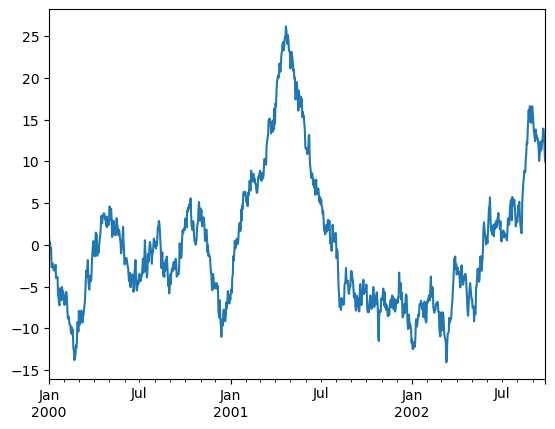

In [181]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

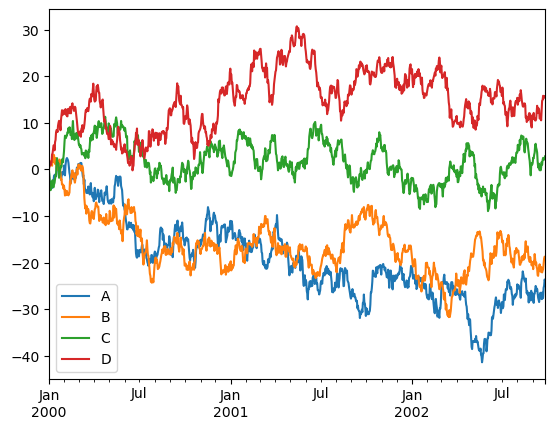

In [183]:
import matplotlib.pyplot as plt

pdf = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc = 'best')